# 1. Import necessary libraries:

In [1]:
import pandas as pd 
import numpy as np

In [2]:
from sklearn.preprocessing import LabelEncoder

In [234]:
from imblearn.over_sampling import SMOTE

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.feature_selection import SelectKBest, chi2

In [7]:
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier

In [8]:
from sklearn.linear_model import LogisticRegression

In [133]:
from sklearn.tree import DecisionTreeClassifier

In [132]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

import xgboost as xgb
import lightgbm as lgbm

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 2. Read Data:

In [9]:
data = pd.read_csv(r'WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [10]:
pd.set_option('display.max_columns', None)

In [11]:
data

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0                  1                        2  Female          94   
1                  2                        3    Male          61   
2                  4                        4    Male          92   
3                  5                        4  Female          56   
4                  7                        1    Male          40   
...              ...                      ...     ...         ...   
1465            2061                        3    Male          41   
1466            2062                        4    Male          42   
1467            2064                        2    Male          87   
1468            2065                        4    Male          63   
1469            2068                        2    Male          82   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
0                  3         2            Sales Executive                4   
1                  2         2         Research Scientist                2   
2                  2         1      Laboratory Technician                3   
3                  3         1         Research Scientist                3   
4                  3         1      Laboratory Technician                2   
...              ...       ...                        ...              ...   
1465               4         2      Laboratory Technician                4   
1466               2         3  Healthcare Representative                1   
1467               4         2     Manufacturing Director                2   
1468               2         2            Sales Executive                2   
1469               4         2      Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
0           Single           5993        19479                   8      Y   
1          Married           5130        24907                   1      Y   
2           Single           2090         2396                   6      Y   
3          Married           2909        23159                   1      Y   
4          Married           3468        16632                   9      Y   
...            ...            ...          ...  

# 3. Data Understanding:

### 3.1. Initial Analysis:

In [12]:
data.shape

(1470, 35)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [14]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [15]:
data.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
count  1470.000000      1470.000000    1470.000000   1470.000000   
mean      2.063946         2.728571    6502.931293  14313.103401   
std       1.106940         1.102846    4707.956783   7117.786044   
min       1.000000         1.000000    1009.000000   2094.000000   
25%       1.000000         2.000000    2911.000000   8047.000000   
50%       2.000000         3.000000    4919.000000  14235.500000   
75%       3.000000         4.000000    8379.000000  20461.500000   
max       5.000000         4.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         1470.000000        1470.000000        1470.000000   
mean             2.693197          15.209524           3.153741   
std              2.498009           3.659938           0.360824   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1470.000000         1470.0       1470.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081209            0.0          0.852077   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.

In [16]:
data.duplicated().any()

False

### Changing Output variable from categorical feature to numerical feature:

In [17]:
data['Attrition'] = data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0 )

### 3.2. Unique feature values:

In [15]:
data.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [16]:
1233/1470

0.8387755102040816

In [17]:
237/1470

0.16122448979591836

### Observation: 
The dataset is imbalanced as 83% data belongs to No class and only 16% belongs to Yes class.

In [18]:
data.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [19]:
data.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [20]:
data.Education.value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [21]:
data.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [22]:
data.EmployeeCount.value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [23]:
data.EmployeeNumber.duplicated().any()

False

In [24]:
data.EnvironmentSatisfaction.value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

In [25]:
data.Gender.value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [26]:
data.JobInvolvement.value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

In [27]:
data.JobLevel.value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

In [28]:
data.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [29]:
data.JobSatisfaction.value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [30]:
data.MaritalStatus.value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [31]:
data.Over18.value_counts()

Y    1470
Name: Over18, dtype: int64

In [32]:
data.OverTime.value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [33]:
data.PercentSalaryHike.value_counts()

11    210
13    209
14    201
12    198
15    101
18     89
17     82
16     78
19     76
22     56
20     55
21     48
23     28
24     21
25     18
Name: PercentSalaryHike, dtype: int64

In [34]:
data.PerformanceRating.value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [35]:
data.RelationshipSatisfaction.value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

In [36]:
data.StandardHours.value_counts()

80    1470
Name: StandardHours, dtype: int64

In [37]:
data.StockOptionLevel.value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

In [38]:
data.TrainingTimesLastYear.value_counts()

2    547
3    491
4    123
5    119
1     71
6     65
0     54
Name: TrainingTimesLastYear, dtype: int64

In [39]:
data.WorkLifeBalance.value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

### 3.3. Data Visualization:

### 3.4.1. Visually Understanding the relationship of each feature with the output variable: (BIVARIATE ANALYSIS)

<Axes: xlabel='Attrition', ylabel='MaritalStatus'>

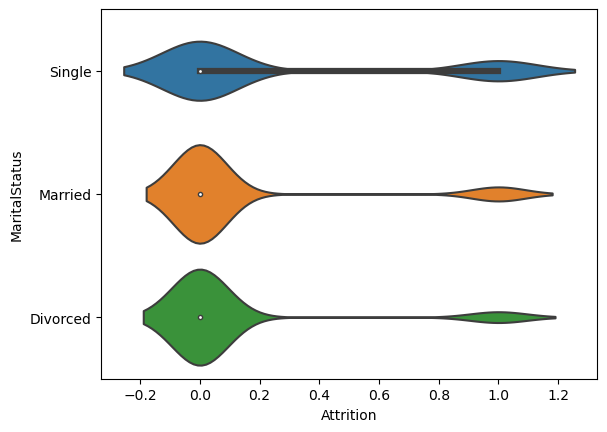

In [51]:
sns.violinplot(x = 'Attrition', y = 'MaritalStatus', data = data)

<Axes: xlabel='Attrition', ylabel='JobRole'>

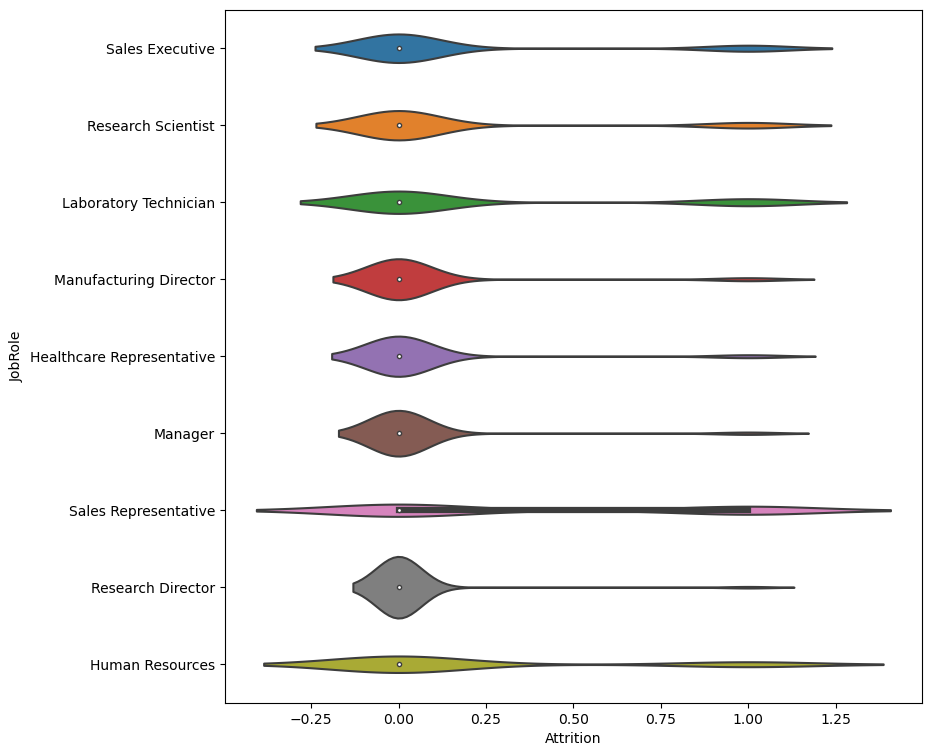

In [52]:
plt.figure(figsize=(9,9))
sns.violinplot(x= 'Attrition', y = 'JobRole', data = data)

<Axes: xlabel='Attrition', ylabel='Department'>

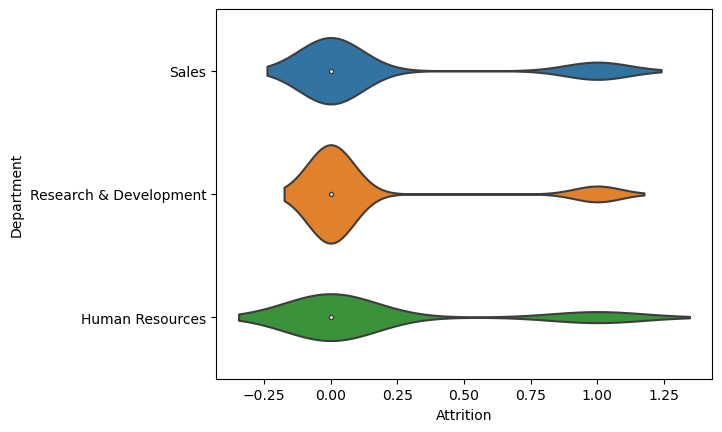

In [53]:
sns.violinplot(x = 'Attrition', y = 'Department', data = data)

<Axes: xlabel='Attrition', ylabel='OverTime'>

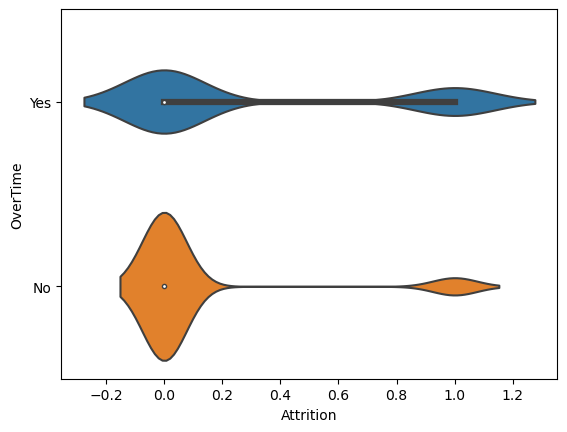

In [54]:
sns.violinplot(x = 'Attrition', y = 'OverTime', data = data)

<Axes: xlabel='Attrition', ylabel='BusinessTravel'>

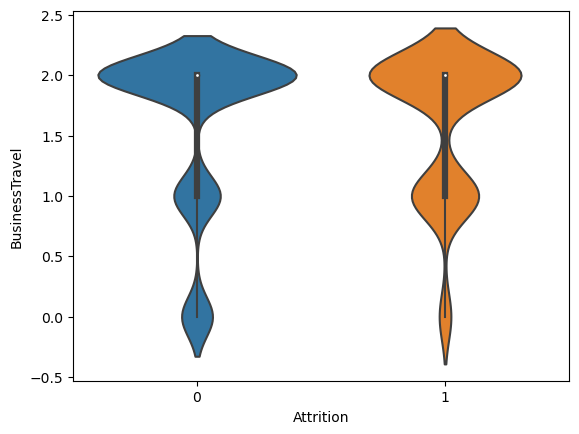

In [55]:
sns.violinplot(x= 'Attrition', y = 'BusinessTravel', data = data_1)

<Axes: xlabel='Attrition', ylabel='Education'>

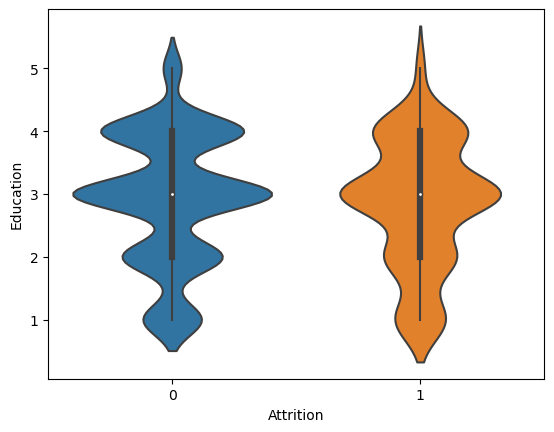

In [56]:
sns.violinplot(x= 'Attrition', y = 'Education', data = data_1)

<Axes: xlabel='Attrition', ylabel='EducationField'>

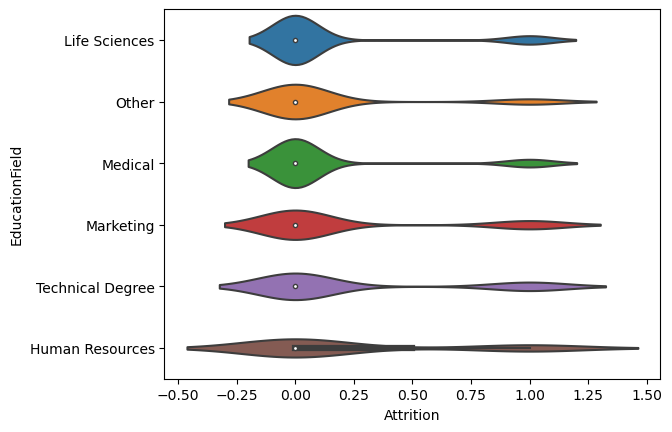

In [57]:
sns.violinplot(x= 'Attrition', y = 'EducationField', data = data)

<Axes: xlabel='Attrition', ylabel='Gender'>

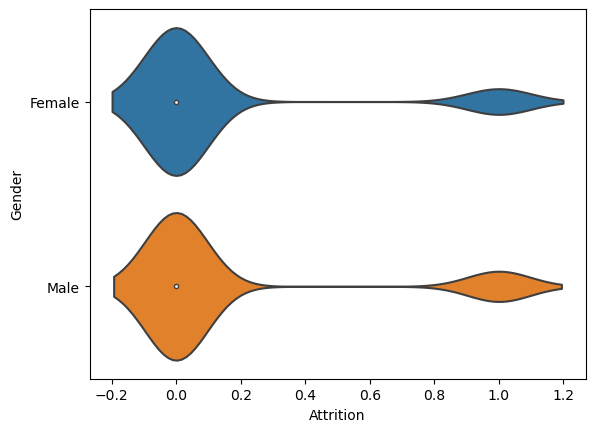

In [58]:
sns.violinplot(x= 'Attrition', y = 'Gender', data = data)

<Axes: xlabel='Attrition', ylabel='EnvironmentSatisfaction'>

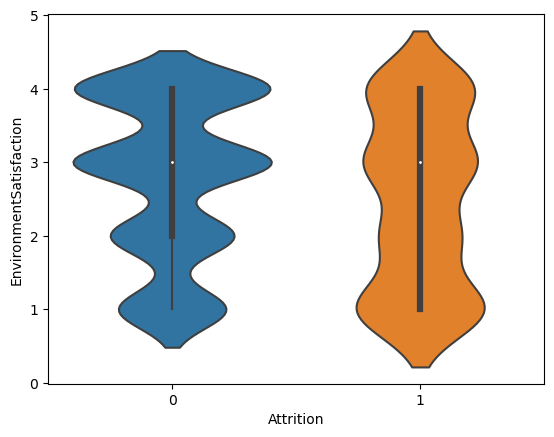

In [59]:
sns.violinplot(x = 'Attrition', y = 'EnvironmentSatisfaction', data = data)

<Axes: xlabel='Attrition', ylabel='JobInvolvement'>

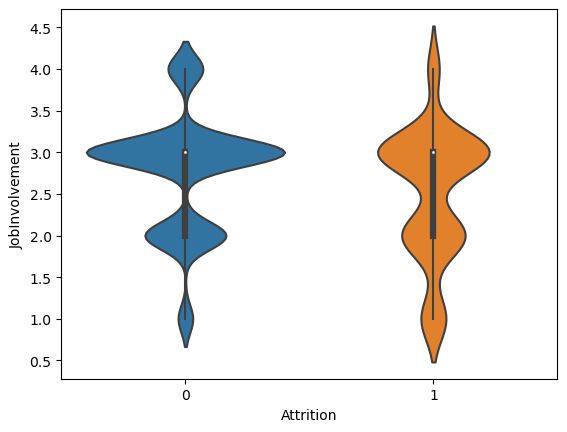

In [60]:
sns.violinplot(x = 'Attrition', y = 'JobInvolvement', data = data)

<Axes: xlabel='Attrition', ylabel='JobLevel'>

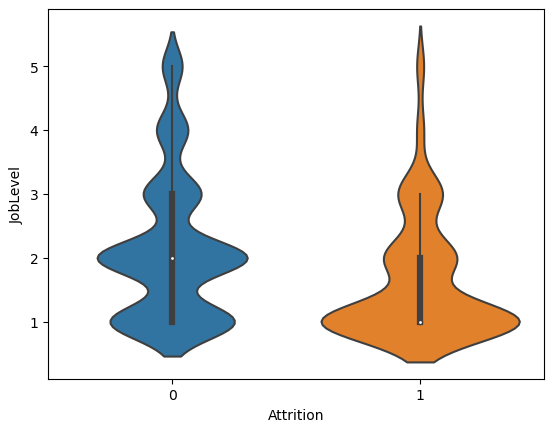

In [61]:
sns.violinplot(x = 'Attrition', y = 'JobLevel', data = data_1)

<Axes: xlabel='Attrition', ylabel='JobSatisfaction'>

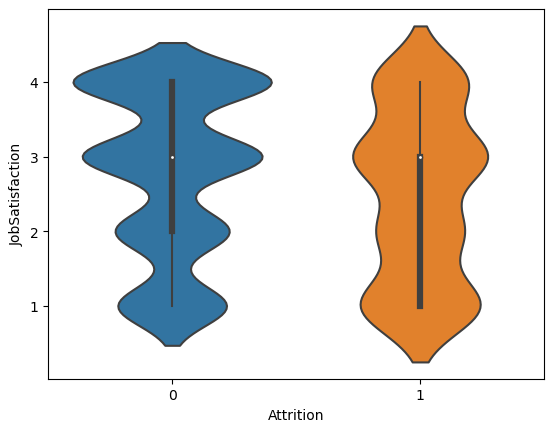

In [62]:
sns.violinplot(x = 'Attrition', y = 'JobSatisfaction', data = data)

<Axes: xlabel='Attrition', ylabel='PerformanceRating'>

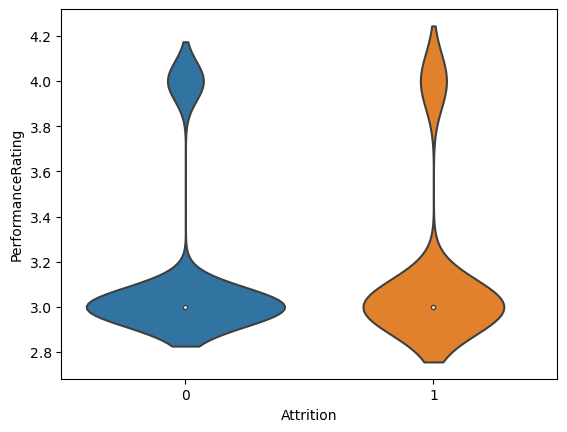

In [63]:
sns.violinplot(x = 'Attrition', y = 'PerformanceRating', data = data)

<Axes: xlabel='Attrition', ylabel='RelationshipSatisfaction'>

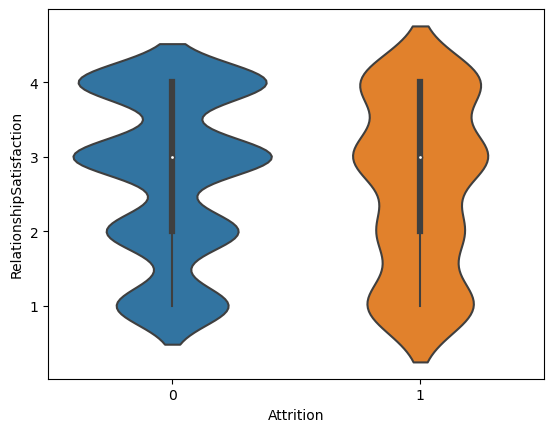

In [64]:
sns.violinplot(x = 'Attrition', y = 'RelationshipSatisfaction', data = data)

<Axes: xlabel='Attrition', ylabel='StockOptionLevel'>

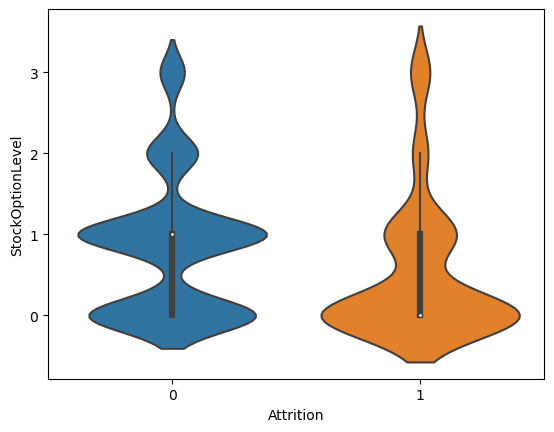

In [65]:
sns.violinplot(x = 'Attrition', y = 'StockOptionLevel', data = data)

<Axes: xlabel='Attrition', ylabel='TrainingTimesLastYear'>

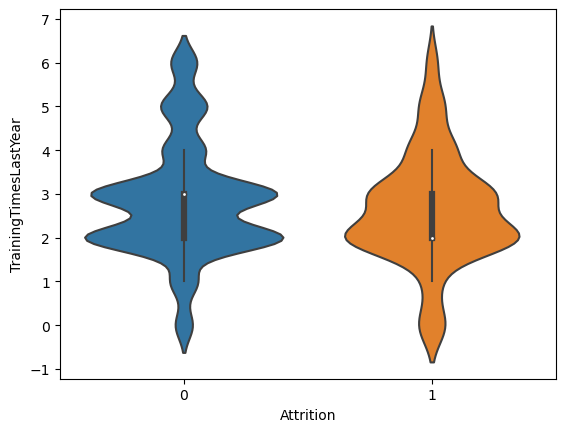

In [66]:
sns.violinplot(x = 'Attrition', y = 'TrainingTimesLastYear', data = data)

<Axes: xlabel='Attrition', ylabel='WorkLifeBalance'>

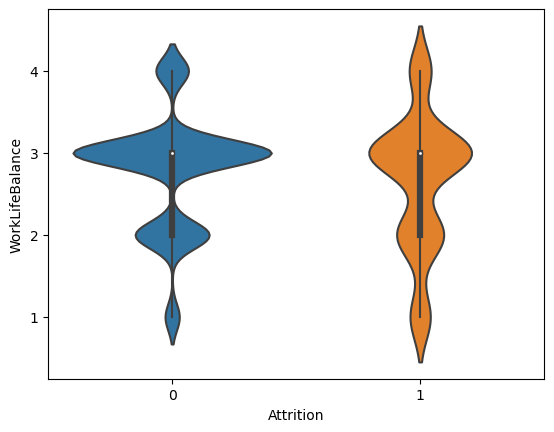

In [67]:
sns.violinplot(x = 'Attrition', y = 'WorkLifeBalance', data = data)

<Axes: xlabel='Attrition', ylabel='Age'>

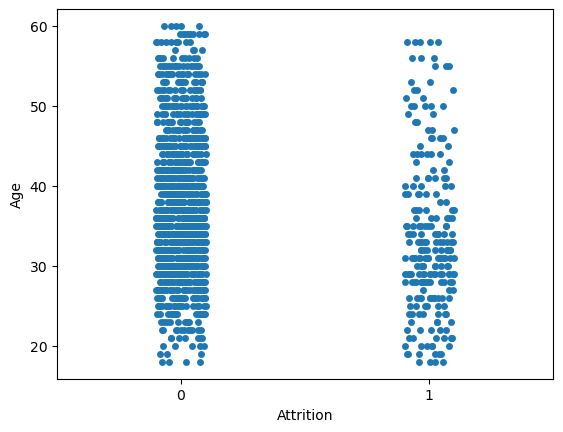

In [68]:
sns.stripplot(x = 'Attrition', y = 'Age', data = data)

<Axes: xlabel='Attrition', ylabel='DailyRate'>

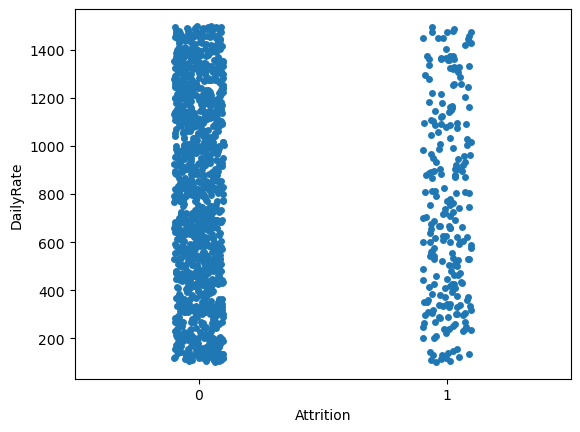

In [69]:
sns.stripplot(x = 'Attrition', y = 'DailyRate', data = data)

<Axes: xlabel='Attrition', ylabel='DistanceFromHome'>

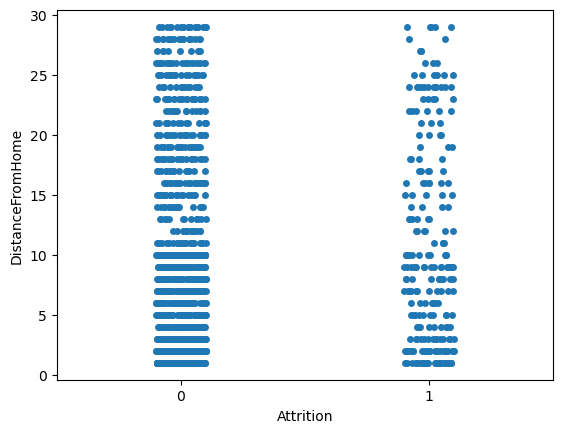

In [70]:
sns.stripplot(x = 'Attrition', y = 'DistanceFromHome', data = data)

<Axes: xlabel='Attrition', ylabel='HourlyRate'>

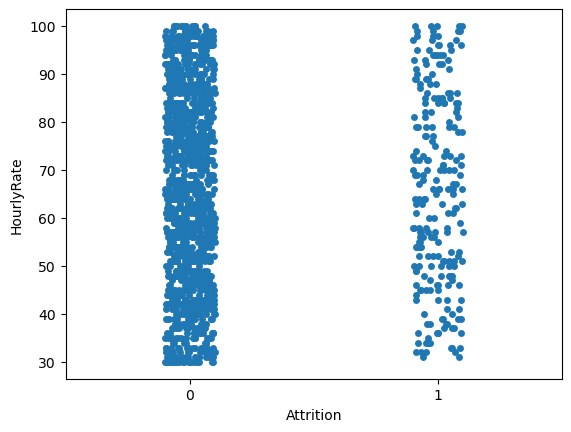

In [71]:
sns.stripplot(x = 'Attrition', y = 'HourlyRate', data = data)

<Axes: xlabel='Attrition', ylabel='MonthlyRate'>

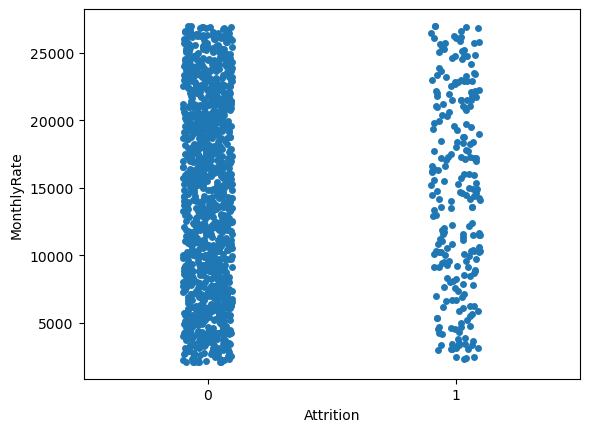

In [72]:
sns.stripplot(x= 'Attrition', y = 'MonthlyRate', data = data_1)

<Axes: xlabel='Attrition', ylabel='MonthlyIncome'>

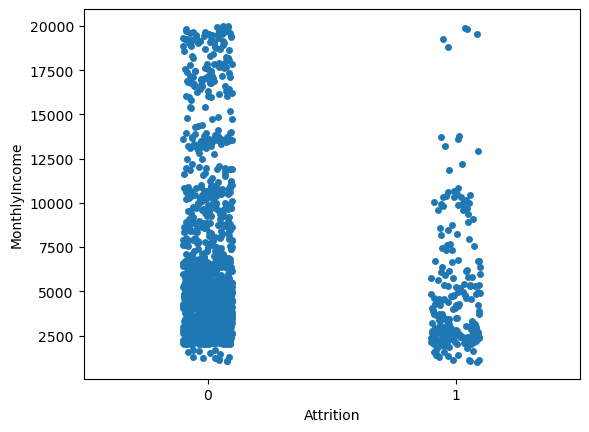

In [73]:
sns.stripplot(x = 'Attrition', y = 'MonthlyIncome', data = data)

<Axes: xlabel='Attrition', ylabel='NumCompaniesWorked'>

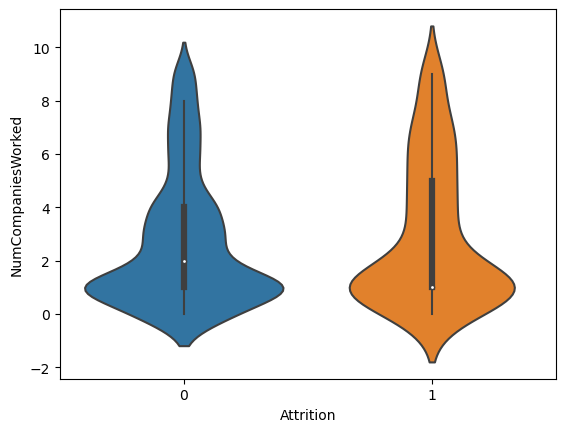

In [74]:
sns.violinplot(x = 'Attrition', y = 'NumCompaniesWorked', data = data)

<Axes: xlabel='Attrition', ylabel='PercentSalaryHike'>

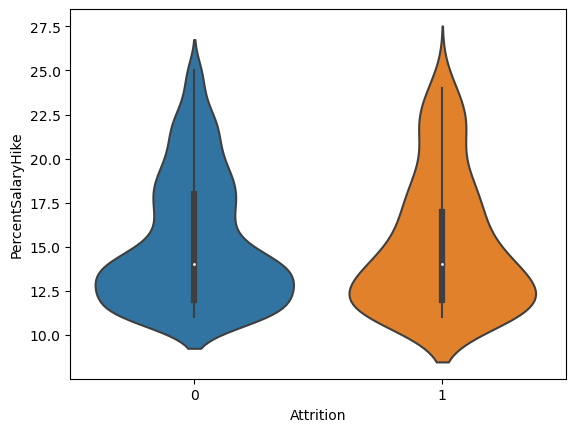

In [75]:
sns.violinplot(x = 'Attrition', y = 'PercentSalaryHike', data = data)

<Axes: xlabel='Attrition', ylabel='TotalWorkingYears'>

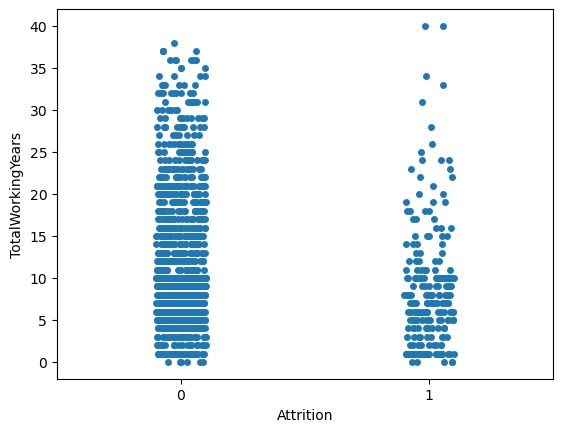

In [76]:
sns.stripplot(x = 'Attrition', y = 'TotalWorkingYears', data = data)

<Axes: xlabel='Attrition', ylabel='YearsAtCompany'>

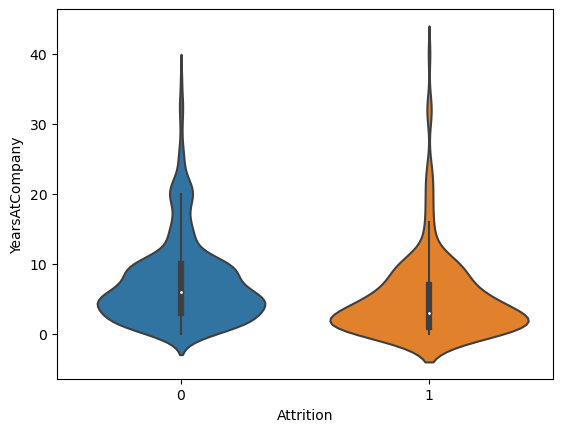

In [77]:
sns.violinplot(x = 'Attrition', y = 'YearsAtCompany', data = data)

<Axes: xlabel='Attrition', ylabel='YearsInCurrentRole'>

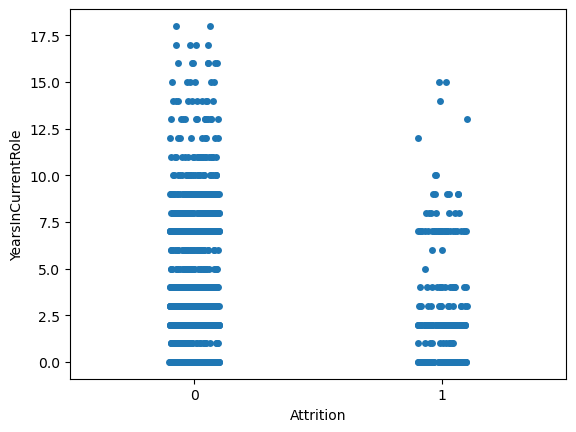

In [78]:
sns.stripplot(x = 'Attrition', y = 'YearsInCurrentRole', data = data)

<Axes: xlabel='Attrition', ylabel='YearsSinceLastPromotion'>

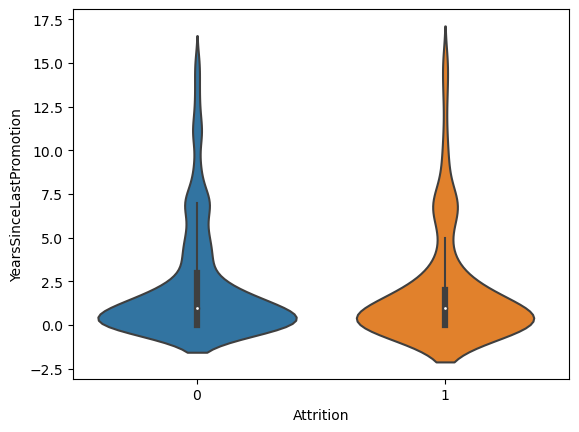

In [79]:
sns.violinplot(x = 'Attrition', y = 'YearsSinceLastPromotion', data = data)

<Axes: xlabel='Attrition', ylabel='YearsWithCurrManager'>

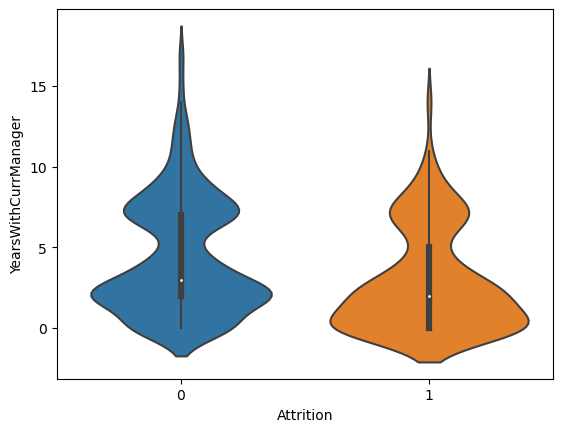

In [80]:
sns.violinplot(x = 'Attrition', y = 'YearsWithCurrManager', data = data)

### 3.4.2. Multivariate Analysis:

In [81]:
sns.pairplot(data = data_1)

### Correlation: 

In [84]:
corr_mat = data_1.corr(numeric_only = True)

In [85]:
corr_mat

Age  Attrition  BusinessTravel  DailyRate  \
Age                       1.000000  -0.159205        0.024751   0.010661   
Attrition                -0.159205   1.000000        0.000074  -0.056652   
BusinessTravel            0.024751   0.000074        1.000000  -0.004086   
DailyRate                 0.010661  -0.056652       -0.004086   1.000000   
Department               -0.031882   0.063991       -0.009044   0.007109   
DistanceFromHome         -0.001686   0.077924       -0.024469  -0.004985   
Education                 0.208034  -0.031373        0.000757  -0.016806   
EducationField           -0.040873   0.026846        0.023724   0.037709   
EnvironmentSatisfaction   0.010146  -0.103369        0.004174   0.018355   
Gender                   -0.036311   0.029453       -0.032981  -0.011716   
HourlyRate                0.024287  -0.006846        0.026528   0.023381   
JobInvolvement            0.029820  -0.130016        0.039062   0.046135   
JobLevel                  0.509604  -0.169105        0.019311   0.002966   
JobRole                  -0.122427   0.067151        0.002724  -0.009472   
JobSatisfaction          -0.004892  -0.103481       -0.033962   0.030571   
MaritalStatus            -0.095029   0.162070        0.024001  -0.069586   
MonthlyIncome             0.497855  -0.159840        0.034319   0.007707   
MonthlyRate               0.028051   0.015170       -0.014107  -0.032182   
NumCompaniesWorked        0.299635   0.043494        0.020875   0.038153   
OverTime                  0.028062   0.246118        0.016543   0.009135   
PercentSalaryHike         0.003634  -0.013478       -0.029377   0.022704   
PerformanceRating         0.001904   0.002889       -0.026341   0.000473   
RelationshipSatisfaction  0.053535  -0.045872       -0.035986   0.007846   
StockOptionLevel          0.037510  -0.137145       -0.016727   0.042143   
TotalWorkingYears         0.680381  -0.171063        0.034226   0.014515   
TrainingTimesLastYear    -0.019621  -0.059478        0.015240   0.002453   
WorkLifeBalance          -0.021490  -0.063939       -0.011256  -0.037848   
YearsAtCompany            0.311309  -0.134392       -0.014575  -0.034055   
YearsInCurrentRole        0.212901  -0.160545       -0.011497   0.009932   
YearsSinceLastPromotion   0.216513  -0.033019       -0.032591  -0.033229   
YearsWithCurrManager      0.202089  -0.156199       -0.022636  -0.026363   

                          Department  DistanceFromHome  Education  \
Age                        -0.031882         -0.001686   0.208034   
Attrition                   0.063991          0.077924  -0.031373   
BusinessTravel             -0.009044         -0.024469   0.000757   
DailyRate                   0.007109         -0.004985  -0.016806   
Department                  1.000000          0.017225   0.007996   
DistanceFromHome            0.017225          1.000000   0.021042   
Education                   0.007996          0.021042   1.000000   
EducationField              0.013720          0.002013  -0.039592   
EnvironmentSatisfaction    -0.019395         -0.016075  -0.027128   
Gender                     -0.041583         -0.001851  -0.016547   
HourlyRate                 -0.004144          0.031131   0.016775   
JobInvolvement             -0.024586          0.008783   0.042438   
JobLevel                    0.101963          0.005303   0.101589   
JobRole                     0.662431         -0.001015   0.004236   
JobSatisfaction             0.021001         -0.003669  -0.011296   
MaritalStatus               0.056073         -0.014437   0.004053   
MonthlyIncome               0.053130         -0.017014   0.094961   
MonthlyRate                 0.023642          0.027473  -0.026084   
NumCompaniesWorked         -0.035882         -0.029251   0.126317   
OverTime                    0.007481          0.025514  -0.020322   
PercentSalaryHike          -0.007840          0.040235  -0.011111   
PerformanceRating          -0.024604          0.027110  -0.024539   
Relationshi

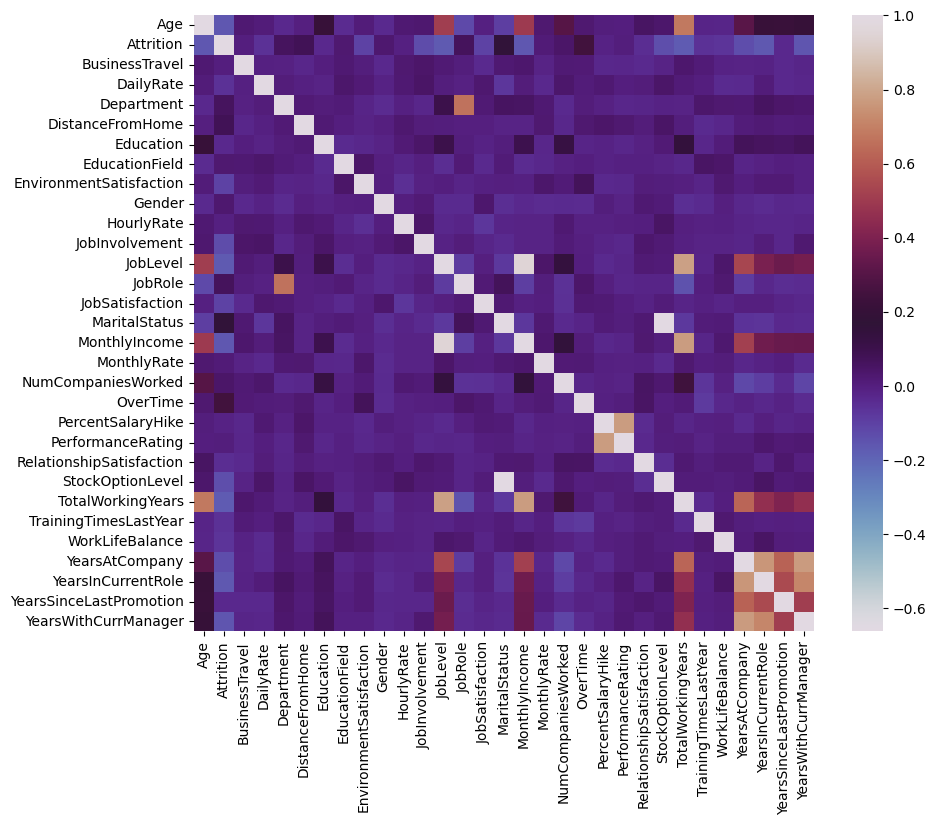

In [86]:
plt.figure(figsize=(10,8))
ch = sns.heatmap(data_1.corr(), cmap='twilight')

# 4. Data Preparation:

### 4.1. Drop unwanted features:

In [18]:
data_1 = data.copy()

In [19]:
data_1

Age  Attrition     BusinessTravel  DailyRate              Department  \
0      41          1      Travel_Rarely       1102                   Sales   
1      49          0  Travel_Frequently        279  Research & Development   
2      37          1      Travel_Rarely       1373  Research & Development   
3      33          0  Travel_Frequently       1392  Research & Development   
4      27          0      Travel_Rarely        591  Research & Development   
...   ...        ...                ...        ...                     ...   
1465   36          0  Travel_Frequently        884  Research & Development   
1466   39          0      Travel_Rarely        613  Research & Development   
1467   27          0      Travel_Rarely        155  Research & Development   
1468   49          0  Travel_Frequently       1023                   Sales   
1469   34          0      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  EnvironmentSatisfaction  Gender  HourlyRate  \
0                  1                        2  Female          94   
1                  2                        3    Male          61   
2                  4                        4    Male          92   
3                  5                        4  Female          56   
4                  7                        1    Male          40   
...              ...                      ...     ...         ...   
1465            2061                        3    Male          41   
1466            2062                        4    Male          42   
1467            2064                        2    Male          87   
1468            2065                        4    Male          63   
1469            2068                        2    Male          82   

      JobInvolvement  JobLevel                    JobRole  JobSatisfaction  \
0                  3         2            Sales Executive                4   
1                  2         2         Research Scientist                2   
2                  2         1      Laboratory Technician                3   
3                  3         1         Research Scientist                3   
4                  3         1      Laboratory Technician                2   
...              ...       ...                        ...              ...   
1465               4         2      Laboratory Technician                4   
1466               2         3  Healthcare Representative                1   
1467               4         2     Manufacturing Director                2   
1468               2         2            Sales Executive                2   
1469               4         2      Laboratory Technician                3   

     MaritalStatus  MonthlyIncome  MonthlyRate  NumCompaniesWorked Over18  \
0           Single           5993        19479                   8      Y   
1          Married           5130        24907                   1      Y   
2           Single           2090         2396                   6      Y   
3          Married           2909        23159                   1      Y   
4          Married           3468        16632                   9      Y   
...            ...            ...   

In [20]:
data_1.drop(columns=['Over18', 'EmployeeCount', 'EmployeeNumber', 'StandardHours'], inplace= True)

In [21]:
data_1

Age  Attrition     BusinessTravel  DailyRate              Department  \
0      41          1      Travel_Rarely       1102                   Sales   
1      49          0  Travel_Frequently        279  Research & Development   
2      37          1      Travel_Rarely       1373  Research & Development   
3      33          0  Travel_Frequently       1392  Research & Development   
4      27          0      Travel_Rarely        591  Research & Development   
...   ...        ...                ...        ...                     ...   
1465   36          0  Travel_Frequently        884  Research & Development   
1466   39          0      Travel_Rarely        613  Research & Development   
1467   27          0      Travel_Rarely        155  Research & Development   
1468   49          0  Travel_Frequently       1023                   Sales   
1469   34          0      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                    1          2  Life Sciences                        2   
1                    8          1  Life Sciences                        3   
2                    2          2          Other                        4   
3                    3          4  Life Sciences                        4   
4                    2          1        Medical                        1   
...                ...        ...            ...                      ...   
1465                23          2        Medical                        3   
1466                 6          1        Medical                        4   
1467                 4          3  Life Sciences                        2   
1468                 2          3        Medical                        4   
1469                 8          3        Medical                        2   

      Gender  HourlyRate  JobInvolvement  JobLevel                    JobRole  \
0     Female          94               3         2            Sales Executive   
1       Male          61               2         2         Research Scientist   
2       Male          92               2         1      Laboratory Technician   
3     Female          56               3         1         Research Scientist   
4       Male          40               3         1      Laboratory Technician   
...      ...         ...             ...       ...                        ...   
1465    Male          41               4         2      Laboratory Technician   
1466    Male          42               2         3  Healthcare Representative   
1467    Male          87               4         2     Manufacturing Director   
1468    Male          63               2         2            Sales Executive   
1469    Male          82               4         2      Laboratory Technician   

      JobSatisfaction MaritalStatus  MonthlyIncome  MonthlyRate  \
0                   4        Single           5993        19479   
1                   2       Married           5130        24907   
2                   3        Single           2090         2396   
3                   3       Married           2909        23159   
4                   2       Married           3468        16632   
...               ...           ...            ...          ...   
1465                4       Married           2571        12290   
1466                1       Married           9991        21457   
1467                2       Married           6142         5174   
1468                2       Married           5390        13243   
1469                3       Married           4404        10228   

      NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
0                      8      Yes                 11                  3   
1                      1       No                 23                  4   
2                      6      Yes                 15                  3   
3                      1      Yes                 11              

### 4.2. Convert categorical columns to numerical columns:

In [22]:
le = LabelEncoder()

In [23]:
data_1['BusinessTravel'] = le.fit_transform(data_1.BusinessTravel)
data_1.Gender = le.fit_transform(data_1.Gender)
data_1.JobRole = le.fit_transform(data_1.JobRole)
data_1.MaritalStatus = le.fit_transform(data_1.MaritalStatus)
data_1.OverTime = le.fit_transform(data_1.OverTime)
data_1.EducationField = le.fit_transform(data_1.EducationField)

In [24]:
data_1.Department = le.fit_transform(data_1.Department)

In [25]:
data_1

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41          1               2       1102           2                 1   
1      49          0               1        279           1                 8   
2      37          1               2       1373           1                 2   
3      33          0               1       1392           1                 3   
4      27          0               2        591           1                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36          0               1        884           1                23   
1466   39          0               2        613           1                 6   
1467   27          0               2        155           1                 4   
1468   49          0               1       1023           2                 2   
1469   34          0               2        628           1                 8   

      Education  EducationField  EnvironmentSatisfaction  Gender  HourlyRate  \
0             2               1                        2       0          94   
1             1               1                        3       1          61   
2             2               4                        4       1          92   
3             4               1                        4       0          56   
4             1               3                        1       1          40   
...         ...             ...                      ...     ...         ...   
1465          2               3                        3       1          41   
1466          1               3                        4       1          42   
1467          3               1                        2       1          87   
1468          3               3                        4       1          63   
1469          3               3                        2       1          82   

      JobInvolvement  JobLevel  JobRole  JobSatisfaction  MaritalStatus  \
0                  3         2        7                4              2   
1                  2         2        6                2              1   
2                  2         1        2                3              2   
3                  3         1        6                3              1   
4                  3         1        2                2              1   
...              ...       ...      ...              ...            ...   
1465               4         2        2                4              1   
1466               2         3        0                1              1   
1467               4         2        4                2              1   
1468               2         2        7                2              1   
1469               4         2        2                3              1   

      MonthlyIncome  MonthlyRate  NumCompaniesWorked  OverTime  \
0              5993        19479                   8         1   
1              5130        24907                   1         0   
2              2090         2396                   6         1   
3              2909        23159                   1         1   
4              3468        16632                   9         0   
...             ...          ...                 ...       ...   
1465           2571        12290                   4         0   
1466           9991        21457                   4         0   
1467           6142         5174                   1         1   
1468           5390        13243                   2         0   
1469           4404        10228                   2         0   

      PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                    11                  3                         1   
1                    23                  4                         4   
2                    15                  3                         2   
3                    11                  3                         3   
4                 

# 5. Model Building | 6. Model Testing | 7. Model Evaluation:

In [139]:
X = data_1.drop(['Attrition'], axis = 1)
y = data_1[['Attrition']]

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.30, stratify= y)

In [141]:
X_train.shape, y_train.shape

((1029, 30), (1029, 1))

In [142]:
X_test.shape, y_test.shape

((441, 30), (441, 1))

#### Verifying if the stratified sampling worked as we wanted by visualization:

<Axes: xlabel='Attrition'>

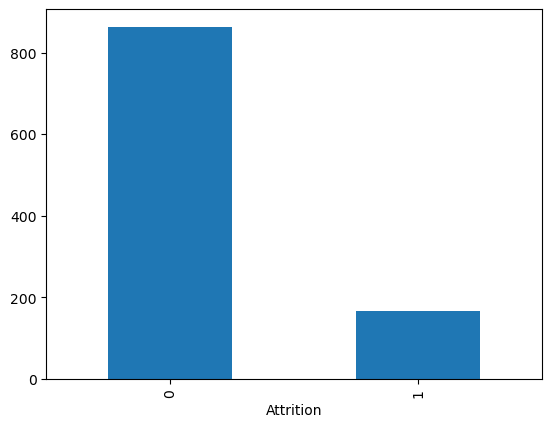

In [146]:
y_train.pivot_table(index= 'Attrition', aggfunc= 'size').plot(kind = 'bar')

<Axes: xlabel='Attrition'>

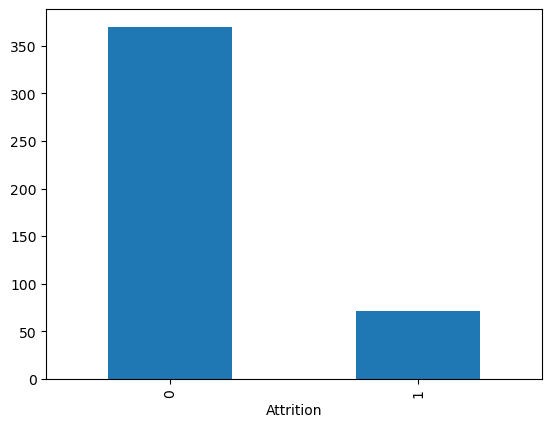

In [147]:
y_test.pivot_table(index = 'Attrition', aggfunc= 'size').plot(kind = 'bar')

## ---------------------------------------------Feature Selection:---------------------------------------------

## -------------------------------------------WITHOUT FEATURE SCALING----------------------------------------

In [134]:
from sklearn.feature_selection import RFE

In [137]:
lr_reg = LogisticRegression()
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()
adb_classifier = AdaBoostClassifier()
xgb_classifier = XGBClassifier()
lgbm_classifier = LGBMClassifier()

In [242]:
smote_model = SMOTE()

##### STRATIFIED SAMPLING:

#### Logistic Regression:

In [244]:
rfe_model = RFE(estimator= LogisticRegression())

In [245]:
rfe_model.fit(X_train, y_train)

RFE(estimator=LogisticRegression())

In [246]:
X.columns[rfe_model.get_support()] # To know which feature is important

Index(['Department', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobLevel', 'JobSatisfaction', 'MaritalStatus', 'OverTime',
       'RelationshipSatisfaction', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [247]:
lr_reg.fit(X_train, y_train)

LogisticRegression()

In [248]:
y_pred_lr = lr_reg.predict(X_test)

In [249]:
confusion_matrix(y_test, y_pred_lr)

array([[370,   0],
       [ 69,   2]], dtype=int64)

In [250]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       370
           1       1.00      0.03      0.05        71

    accuracy                           0.84       441
   macro avg       0.92      0.51      0.48       441
weighted avg       0.87      0.84      0.78       441



In [251]:
X_train_transformed = rfe_model.transform(X_train)

In [252]:
X_test_transformed = rfe_model.transform(X_test)

In [253]:
X_train_transformed.shape, X_test_transformed.shape

((1029, 15), (441, 15))

In [254]:
lr_reg.fit(X_train_transformed, y_train)

LogisticRegression()

In [255]:
y_pred_lr = lr_reg.predict(X_test_transformed)

In [256]:
confusion_matrix(y_test, y_pred_lr)

array([[358,  12],
       [ 46,  25]], dtype=int64)

In [257]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       370
           1       0.68      0.35      0.46        71

    accuracy                           0.87       441
   macro avg       0.78      0.66      0.69       441
weighted avg       0.85      0.87      0.85       441



##### SMOTE IMPLEMENTATION:

In [258]:
X_resampled, y_resampled = smote_model.fit_resample(X_train_transformed, y_train)

In [259]:
y_resampled.value_counts()

Attrition
0            863
1            863
dtype: int64

In [260]:
lr_reg.fit(X_resampled, y_resampled)

LogisticRegression()

In [261]:
y_pred_lr = lr_reg.predict(X_test_transformed)

In [262]:
confusion_matrix(y_test, y_pred_lr)

array([[283,  87],
       [ 22,  49]], dtype=int64)

In [263]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.93      0.76      0.84       370
           1       0.36      0.69      0.47        71

    accuracy                           0.75       441
   macro avg       0.64      0.73      0.66       441
weighted avg       0.84      0.75      0.78       441



#### Decision Tree Classifier:

##### STRATIFIED SAMPLING:

In [264]:
rfe_model = RFE(estimator= DecisionTreeClassifier())

In [265]:
rfe_model.fit(X_train, y_train)

RFE(estimator=DecisionTreeClassifier())

In [266]:
X.columns[rfe_model.get_support()] # To know which feature is important

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'OverTime',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany'],
      dtype='object')

In [267]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [268]:
y_pred_dt = dt_classifier.predict(X_test)

In [269]:
confusion_matrix(y_test, y_pred_dt)

array([[326,  44],
       [ 44,  27]], dtype=int64)

In [270]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       370
           1       0.38      0.38      0.38        71

    accuracy                           0.80       441
   macro avg       0.63      0.63      0.63       441
weighted avg       0.80      0.80      0.80       441



In [271]:
X_train_transformed = rfe_model.transform(X_train)

In [272]:
X_test_transformed = rfe_model.transform(X_test)

In [273]:
X_train_transformed.shape, X_test_transformed.shape

((1029, 15), (441, 15))

In [274]:
dt_classifier.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [275]:
y_pred_dt = dt_classifier.predict(X_test_transformed)

In [276]:
confusion_matrix(y_test, y_pred_dt)

array([[323,  47],
       [ 46,  25]], dtype=int64)

In [277]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       370
           1       0.35      0.35      0.35        71

    accuracy                           0.79       441
   macro avg       0.61      0.61      0.61       441
weighted avg       0.79      0.79      0.79       441



##### SMOTE IMPLEMENTATION:

In [278]:
X_resampled, y_resampled = smote_model.fit_resample(X_train_transformed, y_train)

In [279]:
y_resampled.value_counts()

Attrition
0            863
1            863
dtype: int64

In [280]:
dt_classifier.fit(X_resampled, y_resampled)

DecisionTreeClassifier()

In [281]:
y_pred_dt = dt_classifier.predict(X_test_transformed)

In [282]:
confusion_matrix(y_test, y_pred_dt)

array([[284,  86],
       [ 41,  30]], dtype=int64)

In [283]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82       370
           1       0.26      0.42      0.32        71

    accuracy                           0.71       441
   macro avg       0.57      0.60      0.57       441
weighted avg       0.77      0.71      0.74       441



#### Random Forest Classifier:

##### STRATIFIED SAMPLING:

In [284]:
rfe_model = RFE(estimator= RandomForestClassifier())

In [285]:
rfe_model.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier())

In [286]:
X.columns[rfe_model.get_support()] # To know which feature is important

Index(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate',
       'OverTime', 'PercentSalaryHike', 'StockOptionLevel',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager'],
      dtype='object')

In [287]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [288]:
y_pred_rf = rf_classifier.predict(X_test)

In [289]:
confusion_matrix(y_test, y_pred_rf)

array([[362,   8],
       [ 59,  12]], dtype=int64)

In [290]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       370
           1       0.60      0.17      0.26        71

    accuracy                           0.85       441
   macro avg       0.73      0.57      0.59       441
weighted avg       0.82      0.85      0.81       441



In [291]:
X_train_transformed = rfe_model.transform(X_train)

In [292]:
X_test_transformed = rfe_model.transform(X_test)

In [293]:
X_train_transformed.shape, X_test_transformed.shape

((1029, 15), (441, 15))

In [294]:
rf_classifier.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [295]:
y_pred_rf = rf_classifier.predict(X_test_transformed)

In [296]:
confusion_matrix(y_test, y_pred_rf)

array([[364,   6],
       [ 59,  12]], dtype=int64)

In [297]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       370
           1       0.67      0.17      0.27        71

    accuracy                           0.85       441
   macro avg       0.76      0.58      0.59       441
weighted avg       0.83      0.85      0.81       441



##### SMOTE IMPLEMENTATION:

In [298]:
X_resampled, y_resampled = smote_model.fit_resample(X_train_transformed, y_train)

In [299]:
y_resampled.value_counts()

Attrition
0            863
1            863
dtype: int64

In [300]:
rf_classifier.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [301]:
y_pred_rf = rf_classifier.predict(X_test_transformed)

In [302]:
confusion_matrix(y_test, y_pred_rf)

array([[326,  44],
       [ 46,  25]], dtype=int64)

In [303]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       370
           1       0.36      0.35      0.36        71

    accuracy                           0.80       441
   macro avg       0.62      0.62      0.62       441
weighted avg       0.79      0.80      0.79       441



#### Adaboost Classifier:

##### STRATIFIED SAMPLING:

In [192]:
rfe_model = RFE(estimator= AdaBoostClassifier())

In [193]:
rfe_model.fit(X_train, y_train)

RFE(estimator=AdaBoostClassifier())

In [194]:
X.columns[rfe_model.get_support()] # To know which feature is important

Index(['Age', 'BusinessTravel', 'DailyRate', 'DistanceFromHome',
       'EducationField', 'HourlyRate', 'JobRole', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears'],
      dtype='object')

In [195]:
adb_classifier.fit(X_train, y_train)

AdaBoostClassifier()

In [196]:
y_pred_adb = adb_classifier.predict(X_test)

In [197]:
confusion_matrix(y_test, y_pred_adb)

array([[356,  14],
       [ 44,  27]], dtype=int64)

In [198]:
print(classification_report(y_test, y_pred_adb))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       370
           1       0.66      0.38      0.48        71

    accuracy                           0.87       441
   macro avg       0.77      0.67      0.70       441
weighted avg       0.85      0.87      0.85       441



In [199]:
X_train_transformed = rfe_model.transform(X_train)

In [200]:
X_test_transformed = rfe_model.transform(X_test)

In [201]:
X_train_transformed.shape, X_test_transformed.shape

((1029, 15), (441, 15))

In [202]:
adb_classifier.fit(X_train_transformed, y_train)

AdaBoostClassifier()

In [203]:
y_pred_adb = adb_classifier.predict(X_test_transformed)

In [204]:
confusion_matrix(y_test, y_pred_adb)

array([[356,  14],
       [ 48,  23]], dtype=int64)

In [205]:
print(classification_report(y_test, y_pred_adb))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       370
           1       0.62      0.32      0.43        71

    accuracy                           0.86       441
   macro avg       0.75      0.64      0.67       441
weighted avg       0.84      0.86      0.84       441



##### SMOTE IMPLEMENTATION:

In [235]:
X_resampled, y_resampled = smote_model.fit_resample(X_train_transformed, y_train)

In [236]:
y_resampled.value_counts()

Attrition
0            863
1            863
dtype: int64

In [237]:
adb_classifier.fit(X_resampled, y_resampled)

AdaBoostClassifier()

In [239]:
y_pred_adb = adb_classifier.predict(X_test_transformed)

In [240]:
confusion_matrix(y_test, y_pred_adb)

array([[272,  98],
       [ 34,  37]], dtype=int64)

In [241]:
print(classification_report(y_test, y_pred_adb))

              precision    recall  f1-score   support

           0       0.89      0.74      0.80       370
           1       0.27      0.52      0.36        71

    accuracy                           0.70       441
   macro avg       0.58      0.63      0.58       441
weighted avg       0.79      0.70      0.73       441



#### XGBoost Classifier:

##### STRATIFIED SAMPLING:

In [304]:
rfe_model = RFE(estimator= XGBClassifier())

In [305]:
rfe_model.fit(X_train, y_train)

RFE(estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                            colsample_bylevel=None, colsample_bynode=None,
                            colsample_bytree=None, device=None,
                            early_stopping_rounds=None,
                            enable_categorical=False, eval_metric=None,
                            feature_types=None, gamma=None, grow_policy=None,
                            importance_type=None, interaction_constraints=None,
                            learning_rate=None, max_bin=None,
                            max_cat_threshold=None, max_cat_to_onehot=None,
                            max_delta_step=None, max_depth=None,
                            max_leaves=None, min_child_weight=None, missing=nan,
                            monotone_constraints=None, multi_strategy=None,
                            n_estimators=None, n_jobs=None,
                            num_parallel_tree=None, random_state=None, ...))

In [306]:
X.columns[rfe_model.get_support()] # To know which feature is important

Index(['Age', 'Department', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsWithCurrManager'],
      dtype='object')

In [307]:
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [308]:
y_pred_xgb = xgb_classifier.predict(X_test)

In [309]:
confusion_matrix(y_test, y_pred_xgb)

array([[357,  13],
       [ 46,  25]], dtype=int64)

In [310]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       370
           1       0.66      0.35      0.46        71

    accuracy                           0.87       441
   macro avg       0.77      0.66      0.69       441
weighted avg       0.85      0.87      0.85       441



In [311]:
X_train_transformed = rfe_model.transform(X_train)

In [312]:
X_test_transformed = rfe_model.transform(X_test)

In [313]:
X_train_transformed.shape, X_test_transformed.shape

((1029, 15), (441, 15))

In [314]:
xgb_classifier.fit(X_train_transformed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [315]:
y_pred_xgb = xgb_classifier.predict(X_test_transformed)

In [316]:
confusion_matrix(y_test, y_pred_xgb)

array([[348,  22],
       [ 48,  23]], dtype=int64)

In [317]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       370
           1       0.51      0.32      0.40        71

    accuracy                           0.84       441
   macro avg       0.69      0.63      0.65       441
weighted avg       0.82      0.84      0.83       441



##### SMOTE IMPLEMENTATION:

In [318]:
X_resampled, y_resampled = smote_model.fit_resample(X_train_transformed, y_train)

In [319]:
y_resampled.value_counts()

Attrition
0            863
1            863
dtype: int64

In [320]:
xgb_classifier.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [321]:
y_pred_xgb = xgb_classifier.predict(X_test_transformed)

In [322]:
confusion_matrix(y_test, y_pred_xgb)

array([[328,  42],
       [ 42,  29]], dtype=int64)

In [323]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       370
           1       0.41      0.41      0.41        71

    accuracy                           0.81       441
   macro avg       0.65      0.65      0.65       441
weighted avg       0.81      0.81      0.81       441



#### LGBM Classifier:

##### STRATIFIED SAMPLING:

In [324]:
rfe_model = RFE(estimator= LGBMClassifier())

In [325]:
rfe_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 166, number of negative: 863
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1133
[LightGBM] [Info] Number of data points in the train set: 1029, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161322 -> initscore=-1.648427
[LightGBM] [Info] Start training from score -1.648427
[LightGBM] [Info] Number of positive: 166, number of negative: 863
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1130
[LightGBM] [Info] Number of data points in the train set: 1029, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161322 -> initscore=-1.648427
[LightGBM] [Info] Start training from score -1.648427
[LightGBM] [Info] Numb

RFE(estimator=LGBMClassifier())

In [326]:
X.columns[rfe_model.get_support()] # To know which feature is important

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobRole', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole'],
      dtype='object')

In [327]:
lgbm_classifier.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 166, number of negative: 863
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000301 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1133
[LightGBM] [Info] Number of data points in the train set: 1029, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161322 -> initscore=-1.648427
[LightGBM] [Info] Start training from score -1.648427


LGBMClassifier()

In [328]:
y_pred_lgbm = lgbm_classifier.predict(X_test)

In [329]:
confusion_matrix(y_test, y_pred_lgbm)

array([[359,  11],
       [ 52,  19]], dtype=int64)

In [330]:
print(classification_report(y_test, y_pred_lgbm))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       370
           1       0.63      0.27      0.38        71

    accuracy                           0.86       441
   macro avg       0.75      0.62      0.65       441
weighted avg       0.83      0.86      0.83       441



In [331]:
X_train_transformed = rfe_model.transform(X_train)

In [332]:
X_test_transformed = rfe_model.transform(X_test)

In [333]:
X_train_transformed.shape, X_test_transformed.shape

((1029, 15), (441, 15))

In [334]:
lgbm_classifier.fit(X_train_transformed, y_train)

[LightGBM] [Info] Number of positive: 166, number of negative: 863
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1046
[LightGBM] [Info] Number of data points in the train set: 1029, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161322 -> initscore=-1.648427
[LightGBM] [Info] Start training from score -1.648427


LGBMClassifier()

In [335]:
y_pred_lgbm = lgbm_classifier.predict(X_test_transformed)

In [336]:
confusion_matrix(y_test, y_pred_lgbm)

array([[354,  16],
       [ 60,  11]], dtype=int64)

In [337]:
print(classification_report(y_test, y_pred_lgbm))

              precision    recall  f1-score   support

           0       0.86      0.96      0.90       370
           1       0.41      0.15      0.22        71

    accuracy                           0.83       441
   macro avg       0.63      0.56      0.56       441
weighted avg       0.78      0.83      0.79       441



##### SMOTE IMPLEMENTATION:

In [338]:
X_resampled, y_resampled = smote_model.fit_resample(X_train_transformed, y_train)

In [339]:
y_resampled.value_counts()

Attrition
0            863
1            863
dtype: int64

In [340]:
lgbm_classifier.fit(X_resampled, y_resampled)

[LightGBM] [Info] Number of positive: 863, number of negative: 863
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000155 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1051
[LightGBM] [Info] Number of data points in the train set: 1726, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()

In [341]:
y_pred_lgbm = lgbm_classifier.predict(X_test_transformed)

In [342]:
confusion_matrix(y_test, y_pred_lgbm)

array([[320,  50],
       [ 47,  24]], dtype=int64)

In [343]:
print(classification_report(y_test, y_pred_lgbm))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       370
           1       0.32      0.34      0.33        71

    accuracy                           0.78       441
   macro avg       0.60      0.60      0.60       441
weighted avg       0.78      0.78      0.78       441



## ----------------------------------------------WITH FEATURE SCALING-----------------------------------------

In [351]:
from sklearn.preprocessing import StandardScaler

In [352]:
std_scaler = StandardScaler()

In [353]:
scaled_X = std_scaler.fit_transform(X)

In [354]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size= 0.30, stratify= y)

In [361]:
lr_reg = LogisticRegression()
dt_classifier = DecisionTreeClassifier()
rf_classifier = RandomForestClassifier()
adb_classifier = AdaBoostClassifier()
xgb_classifier = XGBClassifier()
lgbm_classifier = LGBMClassifier()

In [362]:
smote_model = SMOTE()

#### Logistic Regression:

##### STRATIFIED SAMPLING:

In [355]:
rfe_model = RFE(estimator= LogisticRegression())

In [356]:
rfe_model.fit(X_train, y_train)

RFE(estimator=LogisticRegression())

In [357]:
X.columns[rfe_model.get_support()] # To know which feature is important

Index(['EnvironmentSatisfaction', 'Gender', 'JobInvolvement',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'OverTime', 'RelationshipSatisfaction',
       'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [363]:
lr_reg.fit(X_train, y_train)

LogisticRegression()

In [364]:
y_pred_lr = lr_reg.predict(X_test)

In [365]:
confusion_matrix(y_test, y_pred_lr)

array([[356,  14],
       [ 46,  25]], dtype=int64)

In [366]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       370
           1       0.64      0.35      0.45        71

    accuracy                           0.86       441
   macro avg       0.76      0.66      0.69       441
weighted avg       0.85      0.86      0.85       441



In [367]:
X_train_transformed = rfe_model.transform(X_train)

In [368]:
X_test_transformed = rfe_model.transform(X_test)

In [369]:
X_train_transformed.shape, X_test_transformed.shape

((1029, 15), (441, 15))

In [370]:
lr_reg.fit(X_train_transformed, y_train)

LogisticRegression()

In [371]:
y_pred_lr = lr_reg.predict(X_test_transformed)

In [372]:
confusion_matrix(y_test, y_pred_lr)

array([[355,  15],
       [ 46,  25]], dtype=int64)

In [373]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       370
           1       0.62      0.35      0.45        71

    accuracy                           0.86       441
   macro avg       0.76      0.66      0.69       441
weighted avg       0.84      0.86      0.85       441



##### SMOTE IMPLEMENTATION:

In [374]:
X_resampled, y_resampled = smote_model.fit_resample(X_train_transformed, y_train)

In [375]:
y_resampled.value_counts()

Attrition
0            863
1            863
dtype: int64

In [376]:
lr_reg.fit(X_resampled, y_resampled)

LogisticRegression()

In [377]:
y_pred_lr = lr_reg.predict(X_test_transformed)

In [378]:
confusion_matrix(y_test, y_pred_lr)

array([[267, 103],
       [ 26,  45]], dtype=int64)

In [379]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.91      0.72      0.81       370
           1       0.30      0.63      0.41        71

    accuracy                           0.71       441
   macro avg       0.61      0.68      0.61       441
weighted avg       0.81      0.71      0.74       441



#### Decision Tree Classifier:

##### STRATIFIED SAMPLING:

In [380]:
rfe_model = RFE(estimator= DecisionTreeClassifier())

In [381]:
rfe_model.fit(X_train, y_train)

RFE(estimator=DecisionTreeClassifier())

In [382]:
X.columns[rfe_model.get_support()] # To know which feature is important

Index(['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'JobInvolvement',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'TotalWorkingYears',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [383]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [384]:
y_pred_dt = dt_classifier.predict(X_test)

In [385]:
confusion_matrix(y_test, y_pred_dt)

array([[322,  48],
       [ 40,  31]], dtype=int64)

In [386]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       370
           1       0.39      0.44      0.41        71

    accuracy                           0.80       441
   macro avg       0.64      0.65      0.65       441
weighted avg       0.81      0.80      0.80       441



In [387]:
X_train_transformed = rfe_model.transform(X_train)

In [388]:
X_test_transformed = rfe_model.transform(X_test)

In [389]:
X_train_transformed.shape, X_test_transformed.shape

((1029, 15), (441, 15))

In [390]:
dt_classifier.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [391]:
y_pred_dt = dt_classifier.predict(X_test_transformed)

In [392]:
confusion_matrix(y_test, y_pred_dt)

array([[317,  53],
       [ 43,  28]], dtype=int64)

In [393]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       370
           1       0.35      0.39      0.37        71

    accuracy                           0.78       441
   macro avg       0.61      0.63      0.62       441
weighted avg       0.79      0.78      0.79       441



##### SMOTE IMPLEMENTATION:

In [394]:
X_resampled, y_resampled = smote_model.fit_resample(X_train_transformed, y_train)

In [395]:
y_resampled.value_counts()

Attrition
0            863
1            863
dtype: int64

In [396]:
dt_classifier.fit(X_resampled, y_resampled)

DecisionTreeClassifier()

In [397]:
y_pred_dt = dt_classifier.predict(X_test_transformed)

In [398]:
confusion_matrix(y_test, y_pred_dt)

array([[312,  58],
       [ 43,  28]], dtype=int64)

In [399]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       370
           1       0.33      0.39      0.36        71

    accuracy                           0.77       441
   macro avg       0.60      0.62      0.61       441
weighted avg       0.79      0.77      0.78       441



#### Random Forest Classifier:

##### STRATIFIED SAMPLING:

In [400]:
rfe_model = RFE(estimator= RandomForestClassifier())

In [401]:
rfe_model.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier())

In [402]:
X.columns[rfe_model.get_support()] # To know which feature is important

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobRole', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole'],
      dtype='object')

In [403]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [404]:
y_pred_rf = rf_classifier.predict(X_test)

In [405]:
confusion_matrix(y_test, y_pred_rf)

array([[367,   3],
       [ 55,  16]], dtype=int64)

In [406]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       370
           1       0.84      0.23      0.36        71

    accuracy                           0.87       441
   macro avg       0.86      0.61      0.64       441
weighted avg       0.87      0.87      0.83       441



In [407]:
X_train_transformed = rfe_model.transform(X_train)

In [408]:
X_test_transformed = rfe_model.transform(X_test)

In [409]:
X_train_transformed.shape, X_test_transformed.shape

((1029, 15), (441, 15))

In [410]:
rf_classifier.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [411]:
y_pred_rf = rf_classifier.predict(X_test_transformed)

In [412]:
confusion_matrix(y_test, y_pred_rf)

array([[368,   2],
       [ 55,  16]], dtype=int64)

In [413]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       370
           1       0.89      0.23      0.36        71

    accuracy                           0.87       441
   macro avg       0.88      0.61      0.64       441
weighted avg       0.87      0.87      0.84       441



##### SMOTE IMPLEMENTATION:

In [414]:
X_resampled, y_resampled = smote_model.fit_resample(X_train_transformed, y_train)

In [415]:
y_resampled.value_counts()

Attrition
0            863
1            863
dtype: int64

In [416]:
rf_classifier.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [417]:
y_pred_rf = rf_classifier.predict(X_test_transformed)

In [418]:
confusion_matrix(y_test, y_pred_rf)

array([[353,  17],
       [ 42,  29]], dtype=int64)

In [419]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       370
           1       0.63      0.41      0.50        71

    accuracy                           0.87       441
   macro avg       0.76      0.68      0.71       441
weighted avg       0.85      0.87      0.85       441



#### Adaboost Classifier:

##### STRATIFIED SAMPLING:

In [420]:
rfe_model = RFE(estimator= AdaBoostClassifier())

In [421]:
rfe_model.fit(X_train, y_train)

RFE(estimator=AdaBoostClassifier())

In [422]:
X.columns[rfe_model.get_support()] # To know which feature is important

Index(['Age', 'BusinessTravel', 'DailyRate', 'JobInvolvement', 'JobRole',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'RelationshipSatisfaction',
       'StockOptionLevel', 'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [423]:
adb_classifier.fit(X_train, y_train)

AdaBoostClassifier()

In [424]:
y_pred_adb = adb_classifier.predict(X_test)

In [425]:
confusion_matrix(y_test, y_pred_adb)

array([[351,  19],
       [ 41,  30]], dtype=int64)

In [426]:
print(classification_report(y_test, y_pred_adb))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92       370
           1       0.61      0.42      0.50        71

    accuracy                           0.86       441
   macro avg       0.75      0.69      0.71       441
weighted avg       0.85      0.86      0.85       441



In [427]:
X_train_transformed = rfe_model.transform(X_train)

In [428]:
X_test_transformed = rfe_model.transform(X_test)

In [429]:
X_train_transformed.shape, X_test_transformed.shape

((1029, 15), (441, 15))

In [430]:
adb_classifier.fit(X_train_transformed, y_train)

AdaBoostClassifier()

In [431]:
y_pred_adb = adb_classifier.predict(X_test_transformed)

In [432]:
confusion_matrix(y_test, y_pred_adb)

array([[356,  14],
       [ 41,  30]], dtype=int64)

In [433]:
print(classification_report(y_test, y_pred_adb))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       370
           1       0.68      0.42      0.52        71

    accuracy                           0.88       441
   macro avg       0.79      0.69      0.73       441
weighted avg       0.86      0.88      0.86       441



##### SMOTE IMPLEMENTATION:

In [434]:
X_resampled, y_resampled = smote_model.fit_resample(X_train_transformed, y_train)

In [435]:
y_resampled.value_counts()

Attrition
0            863
1            863
dtype: int64

In [436]:
adb_classifier.fit(X_resampled, y_resampled)

AdaBoostClassifier()

In [437]:
y_pred_adb = adb_classifier.predict(X_test_transformed)

In [438]:
confusion_matrix(y_test, y_pred_adb)

array([[313,  57],
       [ 29,  42]], dtype=int64)

In [439]:
print(classification_report(y_test, y_pred_adb))

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       370
           1       0.42      0.59      0.49        71

    accuracy                           0.80       441
   macro avg       0.67      0.72      0.69       441
weighted avg       0.84      0.80      0.82       441



#### XGBoost Classifier:

##### STRATIFIED SAMPLING:

In [440]:
rfe_model = RFE(estimator= XGBClassifier())

In [441]:
rfe_model.fit(X_train, y_train)

RFE(estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                            colsample_bylevel=None, colsample_bynode=None,
                            colsample_bytree=None, device=None,
                            early_stopping_rounds=None,
                            enable_categorical=False, eval_metric=None,
                            feature_types=None, gamma=None, grow_policy=None,
                            importance_type=None, interaction_constraints=None,
                            learning_rate=None, max_bin=None,
                            max_cat_threshold=None, max_cat_to_onehot=None,
                            max_delta_step=None, max_depth=None,
                            max_leaves=None, min_child_weight=None, missing=nan,
                            monotone_constraints=None, multi_strategy=None,
                            n_estimators=None, n_jobs=None,
                            num_parallel_tree=None, random_state=None, ...))

In [442]:
X.columns[rfe_model.get_support()] # To know which feature is important

Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'StockOptionLevel',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

In [443]:
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [444]:
y_pred_xgb = xgb_classifier.predict(X_test)

In [445]:
confusion_matrix(y_test, y_pred_xgb)

array([[360,  10],
       [ 46,  25]], dtype=int64)

In [446]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       370
           1       0.71      0.35      0.47        71

    accuracy                           0.87       441
   macro avg       0.80      0.66      0.70       441
weighted avg       0.86      0.87      0.85       441



In [447]:
X_train_transformed = rfe_model.transform(X_train)

In [448]:
X_test_transformed = rfe_model.transform(X_test)

In [449]:
X_train_transformed.shape, X_test_transformed.shape

((1029, 15), (441, 15))

In [450]:
xgb_classifier.fit(X_train_transformed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [451]:
y_pred_xgb = xgb_classifier.predict(X_test_transformed)

In [452]:
confusion_matrix(y_test, y_pred_xgb)

array([[353,  17],
       [ 42,  29]], dtype=int64)

In [453]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       370
           1       0.63      0.41      0.50        71

    accuracy                           0.87       441
   macro avg       0.76      0.68      0.71       441
weighted avg       0.85      0.87      0.85       441



##### SMOTE IMPLEMENTATION:

In [454]:
X_resampled, y_resampled = smote_model.fit_resample(X_train_transformed, y_train)

In [455]:
y_resampled.value_counts()

Attrition
0            863
1            863
dtype: int64

In [456]:
xgb_classifier.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [457]:
y_pred_xgb = xgb_classifier.predict(X_test_transformed)

In [458]:
confusion_matrix(y_test, y_pred_xgb)

array([[348,  22],
       [ 41,  30]], dtype=int64)

In [459]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       370
           1       0.58      0.42      0.49        71

    accuracy                           0.86       441
   macro avg       0.74      0.68      0.70       441
weighted avg       0.84      0.86      0.85       441



#### LGBM Classifier:

##### STRATIFIED SAMPLING:

In [460]:
rfe_model = RFE(estimator= LGBMClassifier())

In [461]:
rfe_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 166, number of negative: 863
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000445 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1150
[LightGBM] [Info] Number of data points in the train set: 1029, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161322 -> initscore=-1.648427
[LightGBM] [Info] Start training from score -1.648427
[LightGBM] [Info] Number of positive: 166, number of negative: 863
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1147
[LightGBM] [Info] Number of data points in the train set: 1029, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161322 -> initscore=-1.648427
[LightGBM] [Info] Start training from score -1.648427
[LightGBM] [Info] Numb

RFE(estimator=LGBMClassifier())

In [462]:
X.columns[rfe_model.get_support()] # To know which feature is important

Index(['Age', 'DailyRate', 'DistanceFromHome', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobRole', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [463]:
lgbm_classifier.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 166, number of negative: 863
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000442 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1150
[LightGBM] [Info] Number of data points in the train set: 1029, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161322 -> initscore=-1.648427
[LightGBM] [Info] Start training from score -1.648427


LGBMClassifier()

In [464]:
y_pred_lgbm = lgbm_classifier.predict(X_test)

In [465]:
confusion_matrix(y_test, y_pred_lgbm)

array([[363,   7],
       [ 46,  25]], dtype=int64)

In [466]:
print(classification_report(y_test, y_pred_lgbm))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       370
           1       0.78      0.35      0.49        71

    accuracy                           0.88       441
   macro avg       0.83      0.67      0.71       441
weighted avg       0.87      0.88      0.86       441



In [467]:
X_train_transformed = rfe_model.transform(X_train)

In [468]:
X_test_transformed = rfe_model.transform(X_test)

In [469]:
X_train_transformed.shape, X_test_transformed.shape

((1029, 15), (441, 15))

In [470]:
lgbm_classifier.fit(X_train_transformed, y_train)

[LightGBM] [Info] Number of positive: 166, number of negative: 863
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000255 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1035
[LightGBM] [Info] Number of data points in the train set: 1029, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.161322 -> initscore=-1.648427
[LightGBM] [Info] Start training from score -1.648427


LGBMClassifier()

In [471]:
y_pred_lgbm = lgbm_classifier.predict(X_test_transformed)

In [472]:
confusion_matrix(y_test, y_pred_lgbm)

array([[358,  12],
       [ 55,  16]], dtype=int64)

In [473]:
print(classification_report(y_test, y_pred_lgbm))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91       370
           1       0.57      0.23      0.32        71

    accuracy                           0.85       441
   macro avg       0.72      0.60      0.62       441
weighted avg       0.82      0.85      0.82       441



##### SMOTE IMPLEMENTATION:

In [474]:
X_resampled, y_resampled = smote_model.fit_resample(X_train_transformed, y_train)

In [475]:
y_resampled.value_counts()

Attrition
0            863
1            863
dtype: int64

In [476]:
lgbm_classifier.fit(X_resampled, y_resampled)

[LightGBM] [Info] Number of positive: 863, number of negative: 863
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3595
[LightGBM] [Info] Number of data points in the train set: 1726, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier()

In [477]:
y_pred_lgbm = lgbm_classifier.predict(X_test_transformed)

In [478]:
confusion_matrix(y_test, y_pred_lgbm)

array([[352,  18],
       [ 45,  26]], dtype=int64)

In [479]:
print(classification_report(y_test, y_pred_lgbm))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       370
           1       0.59      0.37      0.45        71

    accuracy                           0.86       441
   macro avg       0.74      0.66      0.69       441
weighted avg       0.84      0.86      0.84       441



### Observation:
**The adaboost classifier performs the best after features are scaled.
As the dataset is imbalanced, we look at the f1 score metric for evaluation of classifier's performance.
The adaoost classifier f1 scores are as follows:**

**Stratified Sampling --> 0 : 92%,     1 : 50%**

**RFE                 --> 0 : 93%,     1 : 52%**

**SMOTE               --> 0 : 88%,     1 : 49%**

# THE END!